<a href="https://colab.research.google.com/github/tallerzalan/Applied-Machine-Learning/blob/main/DTs/Exercise_4_dt_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - DTs for regression

1. Use the $\texttt{load_boston}$ data (remember to split your data into a train and test data). Using your training and validation data, optimize the parameters of your DT. How well does your optimized model perform on the test data? Is it better than your optimized SVM for the same data (the third exercise from last week)?
1. (Optional/bonus): Try to perform standardization to your data. Does it improve your model? Further, try to select only the 5 most important features. Does it improve the performance of your model?

**See slides for more details!**

In [156]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import pandas as pd
import numpy as np

X, y = load_boston(return_X_y = True)

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Use `train_test_split` to split your train data into a train and a validation  set.
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state = 42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)
(323, 13) (81, 13) (102, 13) (323,) (81,) (102,)


# Exercise 1

Use the $\texttt{load_boston}$ data (remember to split your data into a train and test data). Using your training and validation data, optimize the parameters of your DT. How well does your optimized model perform on the test data? Is it better than your optimized SVM for the same data (the third exercise from last week)?

In [157]:
min_samples_split_list = [min_split for min_split in np.arange(2, 11, 1)] # input values seperated by ",".
min_samples_leaf_list = [min_leaf for min_leaf in np.arange(2, 11, 1)] # iput values seperated by ",".
max_features_list = [max_feat for max_feat in np.arange(2, 11, 1)] # input values seperated by ",".

results = []

for min_samples_split in min_samples_split_list:
    for min_samples_leaf in min_samples_leaf_list:
        for max_features in max_features_list:
            dt_current = tree.DecisionTreeRegressor(
                min_samples_split = min_samples_split,
                min_samples_leaf = min_samples_leaf,
                max_features = max_features,
                random_state = 42)
            dt_current.fit(X_train, y_train)
            y_val_hat = dt_current.predict(X_val)
            mse = mean_squared_error(y_val_hat, y_val)

            results.append([mse, min_samples_split, min_samples_leaf, max_features])

results = pd.DataFrame(results)
results.columns = ['MSE', 'min_samples_split', 'min_samples_leaf', 'max_features']
print(results)

           MSE  min_samples_split  min_samples_leaf  max_features
0    38.112002                  2                 2             2
1    23.392092                  2                 2             3
2    22.672788                  2                 2             4
3    20.331605                  2                 2             5
4    29.892040                  2                 2             6
..         ...                ...               ...           ...
724  20.205735                 10                10             6
725  17.487001                 10                10             7
726  20.724707                 10                10             8
727  24.217607                 10                10             9
728  22.886812                 10                10            10

[729 rows x 4 columns]


In [158]:
# Extract best parameters.
results[results['MSE'] == results['MSE'].min()]

,MSE,min_samples_split,min_samples_leaf,max_features
5,12.051674,2,2,7
86,12.051674,3,2,7
167,12.051674,4,2,7


In [159]:
# Initialize your final model
dt_optimized = tree.DecisionTreeRegressor(
    min_samples_split = 4,
    min_samples_leaf = 2,
    max_features = 7,
    random_state = 42
    )

# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
dt_optimized.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_test_hat_optimized = dt_optimized.predict(X_test)

# Obtain and check mse on test data
mse_optimized = mean_squared_error(y_test_hat_optimized, y_test)
print(f'Optimized DT achieved MSE = {round(mse_optimized, 2)}.')

Optimized DT achieved MSE = 20.54.


# Exercise 2. (Optional/Bonus)

Try to perform standardization the your data. Does it improve the model?

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [161]:
min_samples_split_list = [min_split for min_split in np.arange(2, 11, 1)] # input values seperated by ",".
min_samples_leaf_list = [min_leaf for min_leaf in np.arange(2, 11, 1)] # iput values seperated by ",".
max_features_list = [max_feat for max_feat in np.arange(2, 11, 1)] # input values seperated by ",".

results = []

for min_samples_split in min_samples_split_list:
    for min_samples_leaf in min_samples_leaf_list:
        for max_features in max_features_list:
            dt_current = tree.DecisionTreeRegressor(
                min_samples_split = min_samples_split,
                min_samples_leaf = min_samples_leaf,
                max_features = max_features,
                random_state = 42)
            dt_current.fit(X_train, y_train)
            y_val_hat = dt_current.predict(X_val)
            mse = mean_squared_error(y_val_hat, y_val)

            results.append([mse, min_samples_split, min_samples_leaf, max_features])

results = pd.DataFrame(results)
results.columns = ['MSE', 'min_samples_split', 'min_samples_leaf', 'max_features']
print(results)

           MSE  min_samples_split  min_samples_leaf  max_features
0    38.112002                  2                 2             2
1    23.392092                  2                 2             3
2    22.672788                  2                 2             4
3    20.331605                  2                 2             5
4    29.329448                  2                 2             6
..         ...                ...               ...           ...
724  20.205735                 10                10             6
725  17.487001                 10                10             7
726  20.724707                 10                10             8
727  24.217607                 10                10             9
728  22.886812                 10                10            10

[729 rows x 4 columns]


In [162]:
# Extract best parameters.
results[results['MSE'] == results['MSE'].min()]

,MSE,min_samples_split,min_samples_leaf,max_features
5,11.326759,2,2,7
86,11.326759,3,2,7
167,11.326759,4,2,7


In [163]:
# Initialize your final model
dt_optimized = tree.DecisionTreeRegressor(
    min_samples_split = 4,
    min_samples_leaf = 2,
    max_features = 7,
    random_state = 42
    )

# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
dt_optimized.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_test_hat_optimized = dt_optimized.predict(X_test)

# Obtain and check mse on test data
mse_optimized = mean_squared_error(y_test_hat_optimized, y_test)
print(f'Optimized DT achieved MSE = {round(mse_optimized, 2)}.')

Optimized DT achieved MSE = 20.54.


# Exercise 3. (Optional/Bonus)

Try to select only the 5 most important features. Does it improve the performance of your model?

In [164]:
importances = dt_optimized.feature_importances_
names = load_boston()['feature_names']

feature_importance = pd.DataFrame(zip(names, importances), columns = ['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending = False).reset_index()
feature_importance[:10]

,index,Feature,Importance
0,5,RM,0.543464
1,12,LSTAT,0.134752
2,4,NOX,0.120257
3,8,RAD,0.083960
4,0,CRIM,0.033290
5,7,DIS,0.021065
6,6,AGE,0.015894
7,11,B,0.015691
8,10,PTRATIO,0.014857
9,9,TAX,0.012841


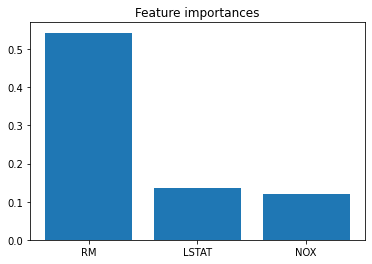

In [165]:
from matplotlib import pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(feature_importance['Feature'][:3], feature_importance['Importance'][:3])
plt.show()

In [166]:
top_features = (-importances).argsort()[:5]
print(top_features)

Z_train = X_train[:, top_features]
Z_test = X_test[:, top_features]

# Initialize a DT
dt = tree.DecisionTreeRegressor(random_state = 42)

# Fit your DT (on the Zs, i.e. the top featueres)
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
mse_optimized = mean_squared_error(y_test_hat, y_test)

print(f'Optimized DT achieved MSE = {round(mse_optimized, 2)}.')

[ 5 12  4  8  0]
Optimized DT achieved MSE = 30.95.
